# Evaluate DQN

In [1]:
# autoreload code changes
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
from banana_env import BananaEnv
from joe_agents.dqn_agent import DqnAgent

## Train a Default Network

In [5]:
# create the environment
exe = "../../deep-reinforcement-learning/p1_navigation/Banana_Windows_x86_64/Banana.exe"
evn_config = {"executable": exe, "train_mode": True}
env = BananaEnv(evn_config)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [6]:
params = {
    "episodes": 1000,
    "batch_size": 64,
    "buffer_size": 10000,
    "learning_rate": 5e-4,
    "discount_rate": 0.9,
    "update_rate": 4,
    "epsilon_decay": 0.995,
    "epsilon_decay_rate": 1,
    "min_epsilon": 0.01,
    "replay": "prioritized",
    "prioritized_replay_damp": 0.6,
    "e_constant": 1e-6,
    "prioritized_replay_beta_anneal_rate": 100,
    "learning_start": 64,
    "double_dqn": True,
    "deuling_dqn": True
}

In [7]:
agent = DqnAgent(37, 4, params)

In [8]:
# load the trained weights from disk
agent.load()

In [9]:
# perform 100 trials and observe how it performs
scores = []
for _ in range(100):
    state = env.reset()
    score = 0
    done = False
    while not done:
        action = agent.act(state)
        state, reward, done, _ = env.step(action)
        score += reward
    scores.append(score)

In [10]:
avg_score = np.mean(scores)

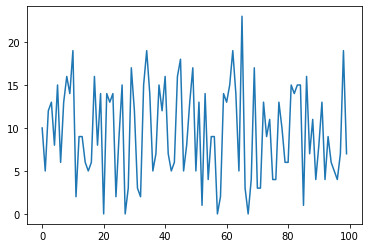

In [11]:
plt.plot(scores)

In [12]:
print("Average score:", avg_score)

Average score: 9.54


In [13]:
env.close()